In [13]:
import pandas as pd
import numpy as np
import copy as copy
import matplotlib.pyplot as plt

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')
datapre = pd.merge(pd.merge(ratings, users), movies)

movies_tidy1=pd.DataFrame(movies.genres.str.split('|').tolist(),index=movies.movie_id)
movies_tidy2=movies_tidy1.stack().reset_index()
movies_genres=movies_tidy2.drop('level_1',axis=1).rename(columns={0:'genres'})
movies=pd.merge(movies.drop('genres',axis=1),movies_genres)
data = pd.merge(pd.merge(ratings, users), movies)

 Q1:An aggregate of the movie ratings for each particular genre.

In [2]:
by_genres = data.groupby('genres').agg({'rating': [np.mean]})
by_genres

,rating
,mean
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684868
Children's,3.422035
Comedy,3.522099
Crime,3.708679
Documentary,3.933123
Drama,3.766332


 Q2:The top 5 highest ranked genre by wommen.

In [3]:
mean_ratings = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings.iloc[0:5,0:1]

gender,F
genres,
Film-Noir,4.018087
Documentary,3.946392
War,3.893138
Musical,3.809108
Drama,3.765662


Q3:The top 5 highest ranked genre by men.

In [4]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings.iloc[0:5,[1]]

gender,M
genres,
Film-Noir,4.092254
Documentary,3.928811
War,3.893375
Drama,3.766589
Crime,3.713720


Q4.A breakdown of a movie’s ratings by age, use any movie of your choice.

I choose movie "One Flew Over the Cuckoo's Nest (1975)" of id 1193

In [7]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data1=copy.deepcopy( datapre[datapre['movie_id'] ==1193])
data1['age_group'] = pd.cut(data1.age, range(0, 81, 10), right=False, labels=labels)
by_age = data1.groupby(['age_group']).agg({'rating': [np.mean]})
by_age

,rating
,mean
age_group,
0-9,4.222222
10-19,4.457831
20-29,4.412371
30-39,4.389578
40-49,4.319372
50-59,4.356061
60-69,NaN
70-79,NaN


Q5.A function that given a userid and movieid, returns a list of userids for other users that rated the movie identified by the provided movieid with the same score.

In [8]:
def find(movieid,userid):
  userscore=datapre[(datapre.user_id==userid)&(datapre.movie_id ==movieid)].iloc[[0]].values[0][2]
  data2=datapre[(datapre.rating==userscore)&(datapre.user_id !=userid)&(datapre.movie_id==movieid)].iloc[:,[0]].values.tolist()
  return data2

In [10]:
find(1193,889)

[[206],
 [925],
 [1051],
 [1111],
 [3589],
 [4016],
 [4539],
 [4650],
 [5311],
 [5326],
 [5334]]

Q6.Some other statistic, figure, aggregate, or plot that you created using this dataset,
along with a short description of what interesting observations you derived from it.

I try to plot the difference between men's and women's rating on certain movies, the movies being compared is the top 20 most rated movies to make the result more convincing.

According to the plot, we could find that men tend to rate higher than women on movies in the genres of science fiction, action and adventure, while women loves literary and story-telling more than men. Also, men tend to give higher ratings.

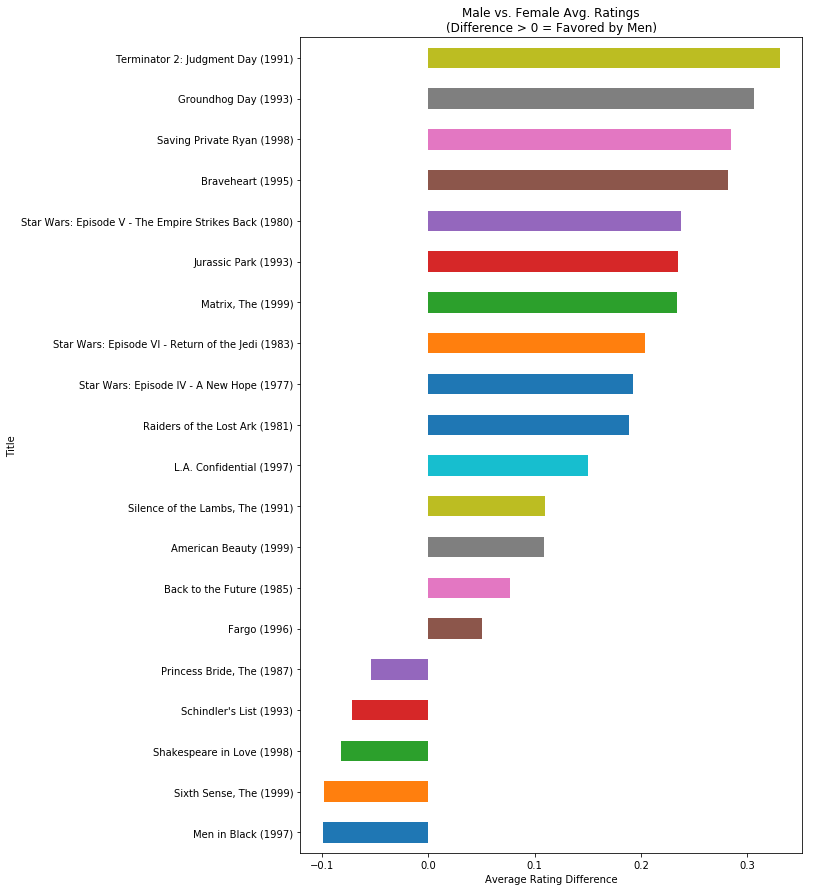

In [14]:
movie_ratings = datapre.pivot_table('rating', index=['movie_id', 'title'], columns='gender', aggfunc='mean')
movie_ratings ['diff'] =movie_ratings.M-movie_ratings.F
movie_ratings.head()
most_20 = datapre.groupby('movie_id').size().sort_values(ascending=False)[:20]
movie_ratings.reset_index('movie_id', inplace=True)
disagreements = movie_ratings [movie_ratings.movie_id.isin(most_20.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');
